In [12]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix
from sklearn.model_selection import KFold

In [13]:
df=pd.read_csv('HoF_dataset.csv')

In [14]:
df.head()

,Name,HoF status,Position,Championships,MVP,DPOY,All-Star,All-NBA,Pts,Reb,Ast,FG%,WS
0,Carlos Boozer,No,2,0,0,0,2,1,16.2,9.5,2.2,52.1,80.3
1,Bruce Bowen,No,2,3,0,0,0,0,6.1,2.8,1.2,40.9,42.9
2,Isiah Thomas,Yes,1,2,0,0,12,5,19.2,3.6,9.3,45.2,80.7
3,Larry Bird,Yes,2,3,3,0,12,10,24.3,10.0,6.3,49.6,145.8
4,Dikembe Mutombo,Yes,3,0,0,4,8,3,9.8,10.3,1.0,51.8,117.0


Championships: number of championships won in career
MVP: number of Most Valuable Player awards won in career
DPOY: number of Defensive Player of the Year in career
All-star: Number of all-star selections
All-NBA: number of all-nba selections
Pts: Average of points in career
Reb: Average of rebounds in career
Ast: Average of assists in career
WS: Total career win shares. Win shares is a player statistics which attempts to divvy up credit for team success to the individuals on the team.
Position(1 - Guard, 2 - Forward, 3 - Center)


In [15]:
hof_mapping={'Yes':1,'No':0}
df['HoF status']=df['HoF status'].map(hof_mapping)
df.head()

,Name,HoF status,Position,Championships,MVP,DPOY,All-Star,All-NBA,Pts,Reb,Ast,FG%,WS
0,Carlos Boozer,0,2,0,0,0,2,1,16.2,9.5,2.2,52.1,80.3
1,Bruce Bowen,0,2,3,0,0,0,0,6.1,2.8,1.2,40.9,42.9
2,Isiah Thomas,1,1,2,0,0,12,5,19.2,3.6,9.3,45.2,80.7
3,Larry Bird,1,2,3,3,0,12,10,24.3,10.0,6.3,49.6,145.8
4,Dikembe Mutombo,1,3,0,0,4,8,3,9.8,10.3,1.0,51.8,117.0


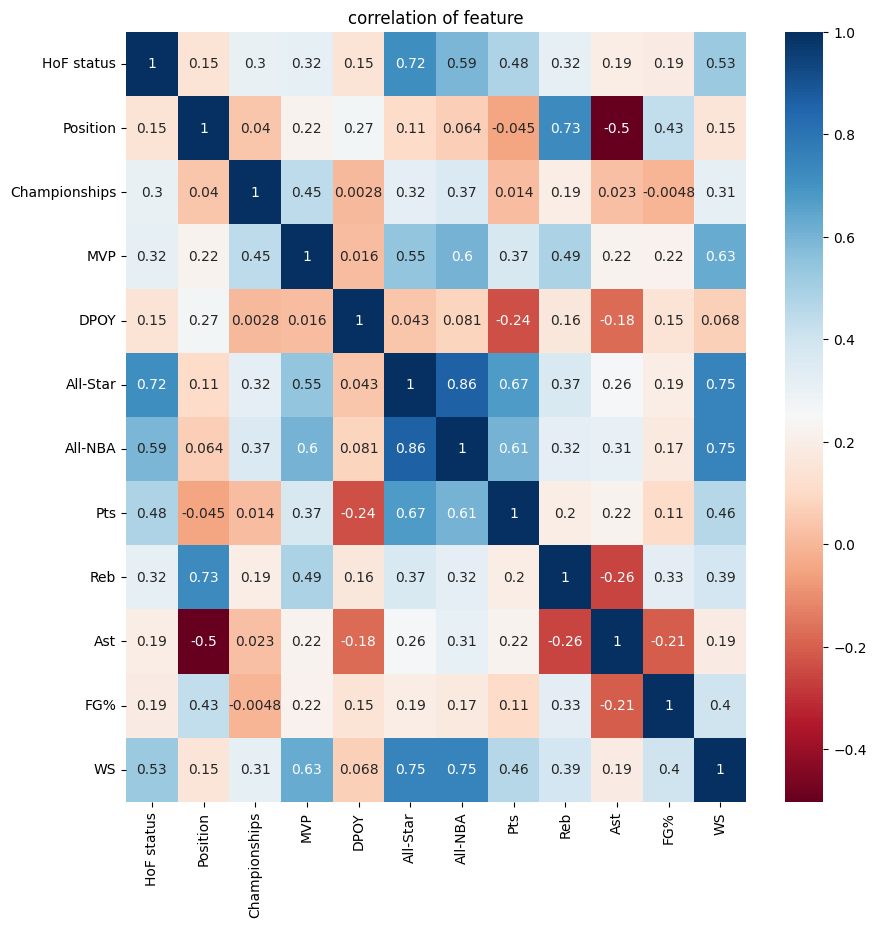

In [16]:
colormap=plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('correlation of feature')
df_noname=df.drop('Name',axis=1)
sns.heatmap(df_noname.corr(),cmap=colormap,annot=True)
plt.show()

In [20]:
from collections import Counter
def detect_outlier(df,n,feature):
    outlier=[]
    for col in feature:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        step=1.5*IQR
        outlier_list=df[(df[col]<Q1-step)|(df[col]>Q3+step)].index
        outlier.extend(outlier_list)
    outlier_indice= Counter(outlier)
    multiple_outliers=[k for k, v in outlier_indice.items() if v > n]
    return multiple_outliers


Outliers_to_drop = detect_outlier(df, 3, ['Pts', 'Reb', 'Ast', 'FG%', 'WS'])
df.loc[Outliers_to_drop]

,Name,HoF status,Position,Championships,MVP,DPOY,All-Star,All-NBA,Pts,Reb,Ast,FG%,WS


In [26]:
x=df_noname.drop('HoF status',axis=1)
y=df_noname['HoF status']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.3)

In [28]:
penalty = ['l1', 'l2']
fit_intercept = [True, False]
C = [0.001, 0.01, 0.1, 0, 1, 10]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'saga']

log_param_grid = {
    'penalty': penalty,
    'C': C,
    'fit_intercept': fit_intercept,
    'solver': solver
}
kfold = KFold(n_splits = 5)

logreg = LogisticRegression(max_iter=100, n_jobs = -1)

gs_logreg = GridSearchCV(estimator=logreg, param_grid=log_param_grid, cv=kfold)
grid_result = gs_logreg.fit(x_train, y_train)

print("Best on training set: {} using {}".format(round((grid_result.best_score_ * 100), 2), grid_result.best_params_))

best_logreg = grid_result.best_estimator_

Y_pred = best_logreg.predict(x_test)
accuracy = round(best_logreg.score(x_test, y_test) * 100, 2)
print("Accuracy of Logistic Regression on test set:", accuracy)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

Best on training set: 89.96 using {'C': 1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of Logistic Regression on test set: 92.31


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

In [39]:
logreg2=LogisticRegression(C= 1, fit_intercept= True, penalty= 'l2', solver= 'lbfgs',max_iter=1000)
logreg2.fit(x_train,y_train)
y_pred2=logreg2.predict(x_test)
a=accuracy_score(y_test,y_pred2)
a


0.9230769230769231

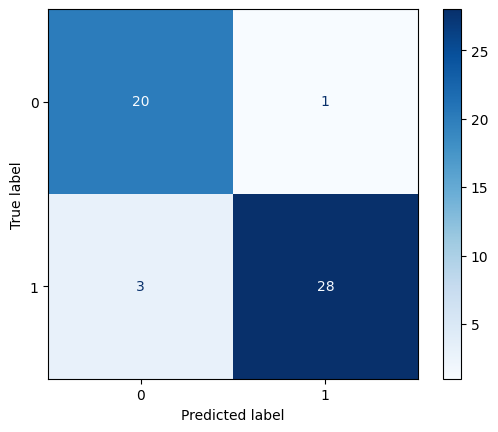

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay as cd
b=confusion_matrix(y_test,y_pred2)
c=cd(confusion_matrix=b,display_labels=[0,1])
c.plot(cmap=plt.cm.Blues)

In [41]:
importances = np.abs(logreg2.coef_[0])
feature_importance_lr = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importance_lr = feature_importance_lr.sort_values('Importance', ascending=True)

In [48]:
feature_importances = [feature_importance_lr]
concat_df = pd.concat(feature_importances) 
mean_importance = concat_df.groupby('Feature')['Importance'].mean().reset_index()
mean_importance = mean_importance.sort_values('Importance', ascending=True)

fig = go.Figure(data=go.Scatter(
    x=mean_importance['Feature'],
    y=mean_importance['Importance'],
    mode='markers',
    marker=dict(
        size=20,
        color=mean_importance['Importance'],
        colorscale='Portland',
        showscale=True
    )
))

fig.update_layout(
    title='Mean Feature importance across models',
    xaxis=dict(title='Feature'),
    yaxis=dict(title='Importance'),
    height = 500,
    width = 800,
    paper_bgcolor = 'black',
    font = dict(
        color = 'white',
        family = 'Courier New',
        size = 15
    )
)

fig.update_xaxes(
    gridcolor='black'
)

fig.update_yaxes(
    gridcolor='black'
)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': array([0.03530332, 0.05329053, 0.14085288, 0.22216365, 0.2243391 , 0.50993403,
                                         0.63431382, 0.66422692, 0.8461523 , 0.84980079, 1.01482233]),
                         'colorscale': [[0.0, 'rgb(12,51,131)'], [0.25,
                                        'rgb(10,136,186)'], [0.5,
                                        'rgb(242,211,56)'], [0.75,
                                        'rgb(242,143,56)'], [1.0,
                                        'rgb(217,30,30)']],
                         'showscale': True,
                         'size': 20},
              'mode': 'markers',
              'type': 'scatter',
              'x': array(['WS', 'FG%', 'Reb', 'Pts', 'All-NBA', 'Ast', 'Position', 'All-Star',
                          'MVP', 'DPOY', 'Championships'], dtype=object),
              'y': array([0.03530332, 0.05329053, 0.14085288, 0.22216365, 0.2243391 , 0.50993403,
                          0.63431382, 0.66422692, 0.8461523 , 0.84980079, 1.01482233])}],
    'layout': {'font': {'color': 'white', 'family': 'Courier New', 'size': 15},
               'height': 500,
               'paper_bgcolor': 'black',
               'template': '...',
               'title': {'text': 'Mean Feature importance across models'},
               'width': 800,
               'xaxis': {'gridcolor': 'black', 'title': {'text': 'Feature'}},
               'yaxis': {'gridcolor': 'black', 'title': {'text': 'Importance'}}}
})

C:\Users\PC\AppData\Local\Temp\ipykernel_8532\2334270459.py:23: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.



<module 'matplotlib.pyplot' from 'C:\\Users\\PC\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

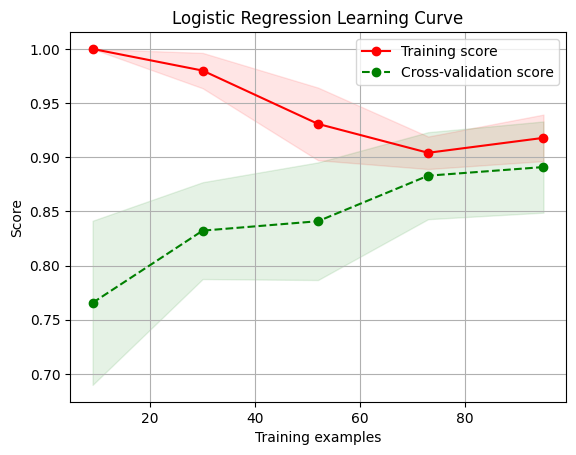

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", linestyle = '--',
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(best_logreg, "Logistic Regression Learning Curve", x_train, y_train, cv=kfold)